In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# define ODE model
def lotkavolterra(y0,t,parameters):
    # parameters
    alpha = parameters['alpha'] # rabbit growth rate
    beta = parameters['beta']   # rabbit decay rate (killed by foxes)
    gamma = parameters['gamma'] # fox growth rate (eating rabbits)
    delta = parameters['delta'] # fox decay rate
    # variables
    x = y0[0]
    y = y0[1]
    # ODEs
    dxdt = alpha*x - beta*x*y #rate of change of number of rabbits over time
    dydt = gamma*x*y - delta*y #rate of change of number of foxes over time
    return [dxdt, dydt]

Text(0.5, 1.0, 'phase space')

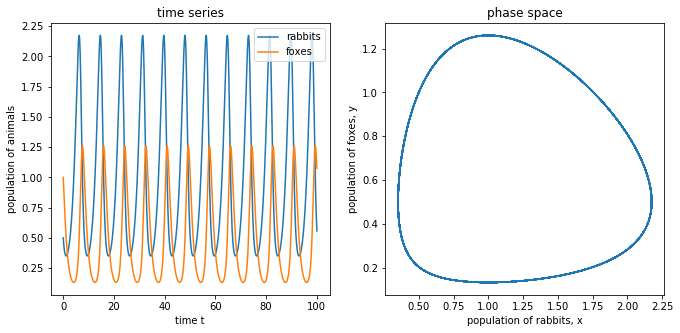

In [3]:
# define time, initial conditions and parameters for integration
t = np.arange(0, 100, 0.01)
y0 = [0.5, 1]
parameters = {'alpha':2/3, 'beta':4/3,
              'gamma':1, 'delta':1}

# solve ODE model
sol = odeint(lotkavolterra, y0, t, args=(parameters,))
x = sol[:,0] #rabbits
y = sol[:,1] #foxes

# plot solution 
# subplot 1: time series
fig1 = plt.figure(figsize=(11,5))

ax1 = fig1.add_subplot(121)
ax1.plot(t, x, label='rabbits')
ax1.plot(t, y, label='foxes')
ax1.legend()
ax1.set_xlabel('time t'); ax1.set_ylabel('population of animals')
ax1.set_title('time series')

# subplot 2: phase space (instead of x vs t, phase space is one variable vs another)
ax1 = fig1.add_subplot(122)
ax1.plot(x, y)
ax1.set_xlabel('population of rabbits, x'); ax1.set_ylabel('population of foxes, y')
ax1.set_title('phase space')

Text(0.5, 0.98, 'CONSERVATIVE OSCILLATIONS: different initial conditions\nproduce different cycles in phase space')

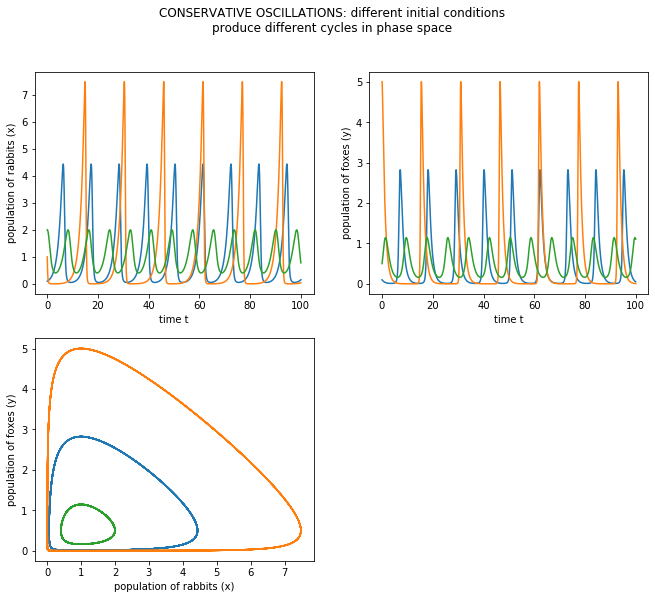

In [4]:
# what happens with different initial conditions?
y0_1 = [0.1, 0.1]
y0_2 = [1, 5]
y0_3 = [2, 0.5]

sol1 = odeint(lotkavolterra, y0_1, t, args=(parameters,))
sol2 = odeint(lotkavolterra, y0_2, t, args=(parameters,))
sol3 = odeint(lotkavolterra, y0_3, t, args=(parameters,))

x1, y1 = sol1[:,0], sol1[:,1]
x2, y2 = sol2[:,0], sol2[:,1]
x3, y3 = sol3[:,0], sol3[:,1]

# plot 
fig2 = plt.figure(figsize=(11,9))

# subplot 1: population of rabbits
ax1 = fig2.add_subplot(221)
ax1.plot(t, x1); ax1.plot(t, x2); ax1.plot(t, x3)
ax1.set_xlabel('time t'); ax1.set_ylabel('population of rabbits (x)')

# subplot 2: population of foxes 
ax2 = fig2.add_subplot(222)
ax2.plot(t, y1); ax2.plot(t, y2); ax2.plot(t, y3)
ax2.set_xlabel('time t'); ax2.set_ylabel('population of foxes (y)')

# subplot 3: phase portraits for the different solutions 
ax3 = fig2.add_subplot(223)
ax3.plot(x1, y1); ax3.plot(x2, y2); ax3.plot(x3, y3)
ax3.set_xlabel('population of rabbits (x)'); ax3.set_ylabel('population of foxes (y)')

fig2.suptitle('CONSERVATIVE OSCILLATIONS: different initial conditions\nproduce different cycles in phase space')